# Introduzione ai sensori digitali - S10

**Informazioni generali:** Studio accelerometro MPU6050



Alimentazione MPU-6050 da 0V a 6V, scegliamo di alimentarlo tra 0V e 5V.



## Task 13 - Caratteristiche dell MPU 6050


### Accelerometro


Sensibilità sensore

|Range|Sensibilità|
|:-:|:-:|
|$\pm$ 2g|61 $\mu{g}$|
|$\pm$ 4g|122 $\mu{g}$|
|$\pm$ 8g|244 $\mu{g}$|
|$\pm$ 16g|488 $\mu{g}$|



Accuratezza sensore

|Asse | Accuratezza [milli g]
|:-:|:-:|
|asse x e y| $\pm50$ |
| asse z | $\pm80$ |


L' output è a 16 bit in complemento a 2.

I valori forniti dal costruttore sono da considerarsi con una tolleranza del $\pm3\%$ e una sensibilità attorno all asse del $\pm2\%$.

La frequenza di sampling va da 4Hz a 1Khz





### Giroscopio



Sensibilità giroscopio
|Range [gradi/sec]|Sensibilità [milligradi/sec]|
|:-:|:-:|
|$\pm$ 250 |7.6|
|$\pm$ 500 |15.2|
|$\pm$ 1000| 30 |
|$\pm$ 2000| 60 |

Accuratezza giroscopio $\pm 20gradi/sec$


I valori forniti dal costruttore sono da considerarsi con una tolleranza del $\pm3\%$ e una sensibilità attorno all asse del $\pm2\%$.



La frequenza di sampling va da 4Hz a 8KHz

I dati passano per un ADC di tipo $\Delta\Sigma$

Usiamo alimentazione 0V - 3.3V







## Task 14 - pin sensore, alimentazione I2C, indirizzo SAD


Pin del sensore 

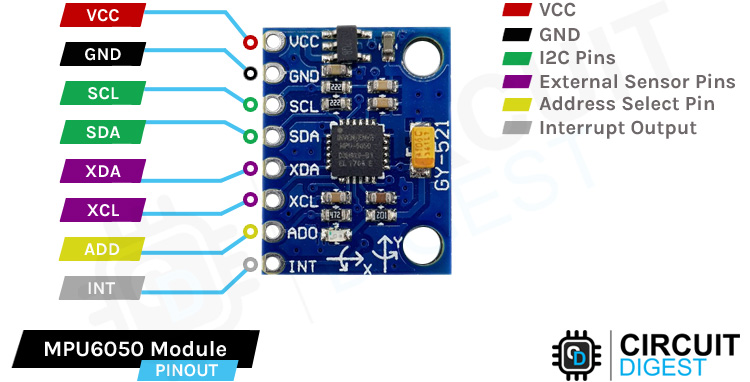


Il sensore possiede svariati pin, oltre le alimentazioni a 5 Volt( ma funzionanti senza degradazione alcuna anche a 3.3V) sono presenti 2 diversi canali I2C, uno su cui l'MPU agisce da Slave con indirizzo 0x68 o 0x69( 0b110100x) e uno, XDA XCL, in cui l'MPU si comporta come master.
Il pin AD0 rende possibile scegliere l'ultimo bit dell'indirizzo, cambiamento non riflettuto nel registro "whoAmI" e un pin in output che viene usato come interrupt per segnalare eventi come overflow, presenza di dati o comunicazioni da slave sul bus ausiliario (XDA, XCL).













    














# Task 15 - Comandi dell' integrato

La comunicazione I2C presenta, come sempre, comandi di lettura e scrittura da registri, di cui quelli più importanti sono il 107 e 108, power management, controllano l'accensione e il comportamento di sleep a bassa potenza del dispositivo, e i registri da 59 a 72, che contengono le misure dell'accelerometro, giroscopio e termometro, e il 27 e 28 che controllano il comportamento( fondo scala e self test) di accelerometro e giroscopio.

Altri molto utili sono i registri 117, contenente SAD del sensore senza tuttavia il valore dell'ultimo bit, 104, che triggera un soft-reset delle pipeline dati dei sensori, e da 55 a 58, configurazioni e status degli interrupt, utili per assicurarsi di leggere ogni dato e per sapere se ci si trova in situazioni anomale.

Inoltre sono presenti i registri da 36 a 53 e da 73 a 103 che servono per le comunicazioni I2C con oggetti collegati in cascata all'MPU e non direttamente al dispositivo Master.


La formula necessaria per convertire il valore del registro del termometro in gradi celsius si usa le legge di conversione
$ T_{°C} = \frac{T_{decoded}}{340}+36.53 $

invece per convertire le misure di accelerometro e giroscopio rispettivamente in unità di g e °/s basta semplicemente dividere il valore del registro per $ 2^{(14-ASF)} $


# Task 16 - Script 

Lo script è nella cartella S10\Code\reading_data.ipynb

## Task 17 - Studio del sensore e misure

### Deviazione standard variando AFS e assi di misura
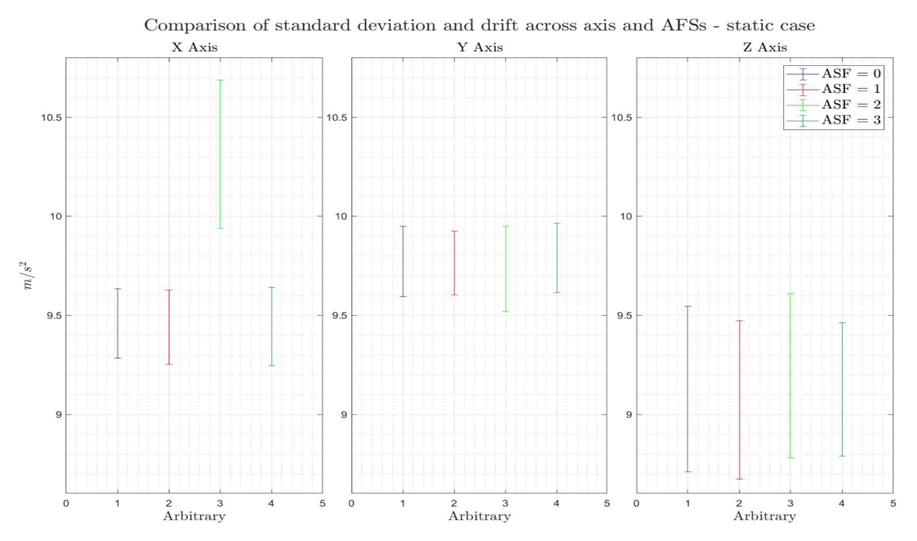








Per lo studio statistico del sensore abbiamo eseguito misure di g facendo variare AFS e l asse orientato in direzione di g.
Non si notano differenze significative al variando AFS.
Invece variando gli assi i valori di g "medi" sono sensibilmente diversi, questo può indicare la presenza di un bias

Confrontando con quanto dichiarato dal costruttore il bias rilevato risulta entro la deviazione standard (±3%) fornita, può essere migliorato con un opportuna calibrazione.


Per le conversioni abbiamo posto 
1g = 9.80665 m/s2



#### Misure a temperature diverse

Le temperature indicate sono state ottenute posizionando il sensore su una stampante 3D spenta, nella prima fase di accensione e a pieno regime rispettivamente, i risultati non mostrano differenze significative.

Il cambiamento di sensitività per temperatura è ±2%

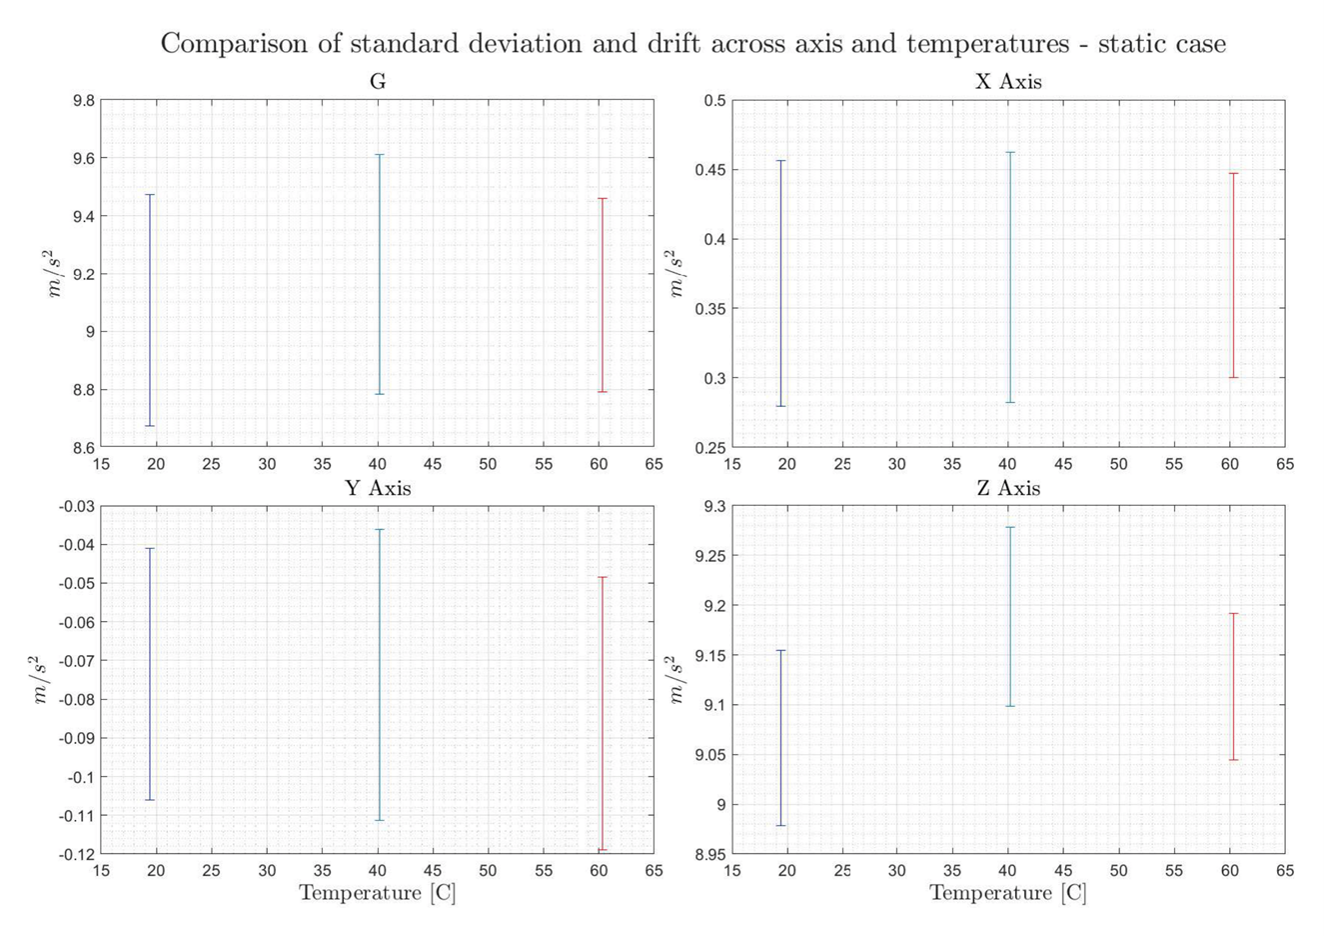

### Misure a diverse latitudini


Le due misurazioni mostrano un valore centrale di g diverso

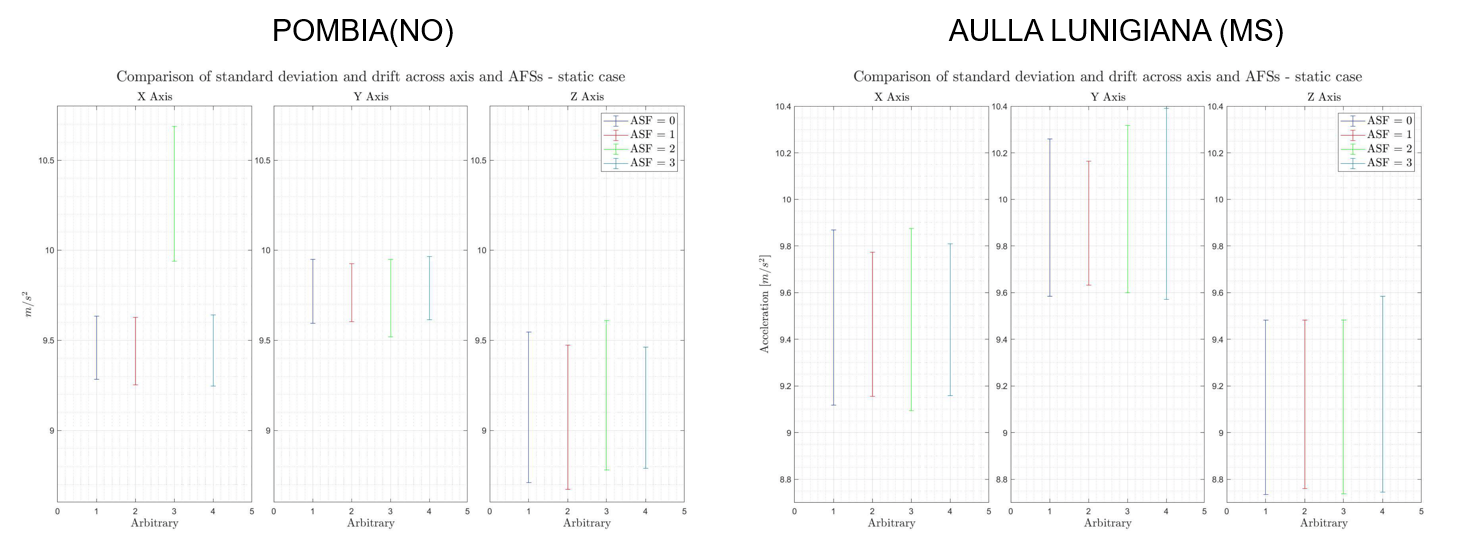

### Analisi Distribuzione delle misure

Abbiamo fittato le prese dati a 0g e 1g con una distribuzione Gaussiana per ogni combinazione di assi e AFS

Misura a 0g

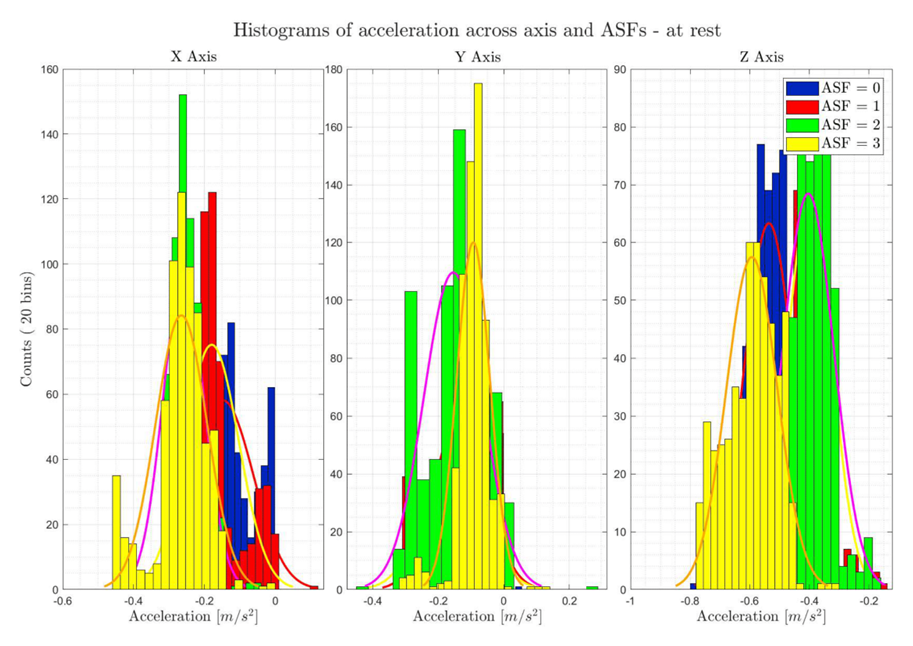


Misura a 1g

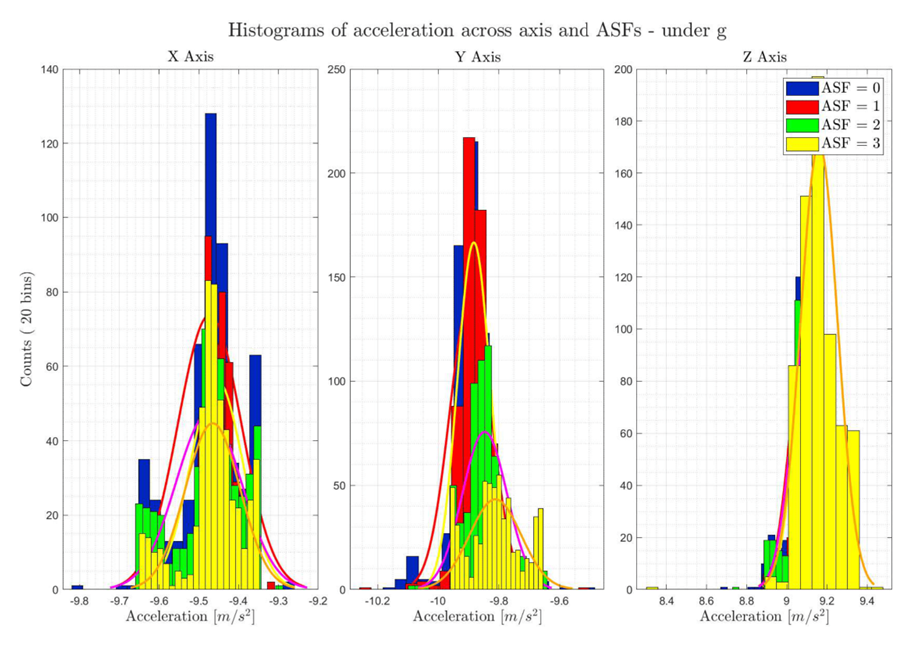

Non si osservano differenze significative nelle larghezze delle gaussiane per diversi valori di AFS, probabilmente perché la varianza della misura è molto maggiore della precisione, rendendo gli effetti dovuti al diverso AFS non osservabili.

Si nota un comportamento peggiore per l’asse z, probabilmente per differenze strutturali.




## Misura tilt sensore

Le misure sono state eseguite ruotando il sensore seguendo lo schema del pannello inferiore

Il valore di g misurato (spezzata magenta) è stato ottenuto sommando vettorialmente le componenti dell’accelerazione lungo i 3 assi

Per stabilire l orientazione degli assi ogni asse è considerato «attivo» se contribuisce a 80% o più del modulo dell’accelerazione

Nell’analisi statistica del sensore si è notata la diversa calibrazione degli assi.
Per stabilire la misura di g di ognuno è stata fatta la media dei vari g per le diverse calibrazioni.

Per escludere valori dell’accelerazione dovuti a movimenti rapidi sono stati esclusi quelli  <80% e >120% del valore di g per il singolo asse.

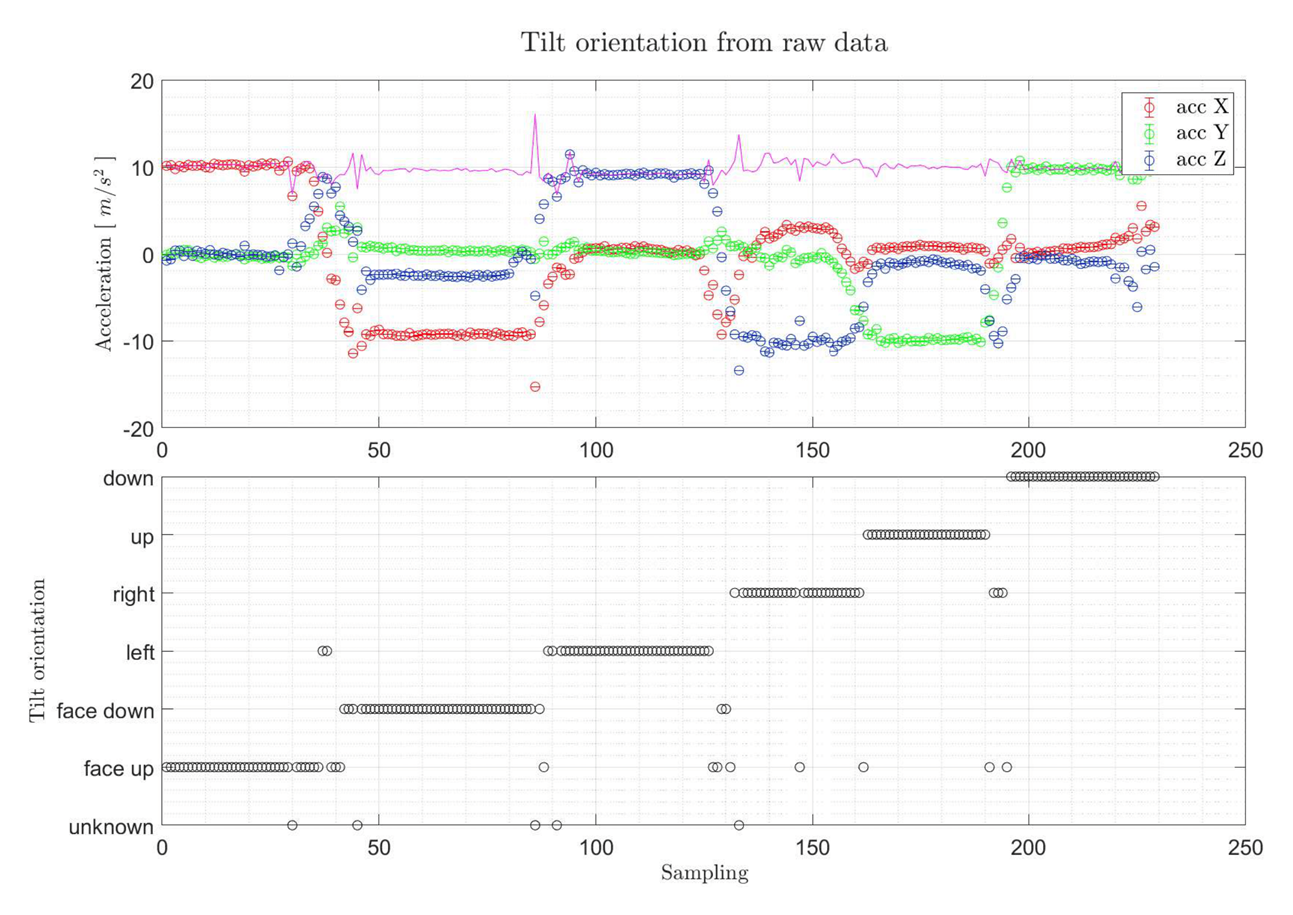

